<a href="https://colab.research.google.com/github/joananana/CAN/blob/main/Exerc%C3%ADcios_C%C3%A1p_5_6_Sistemas_Lineares_e_N%C3%A3o_Lineares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

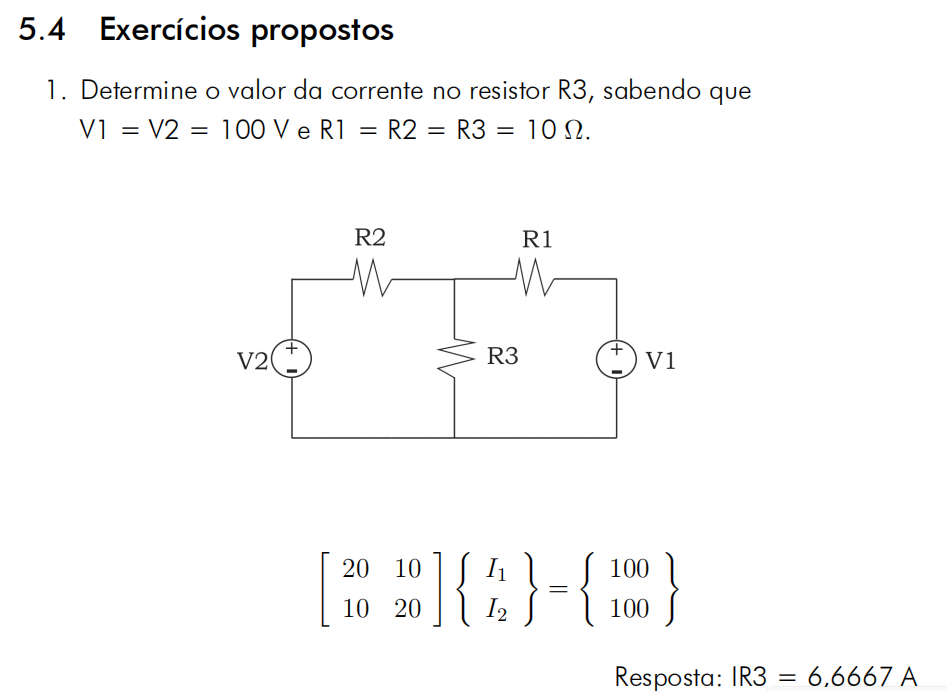

In [1]:
# Exercício 1
# Resolução de sistema lineares
# Método direto: Eliminação de Gauss

import numpy
from numpy import array, zeros

def GaussEliminacao(A,b):
  n = len(b)
  x = zeros(n,float)

  #eliminação progressiva
  for k in range (n-1):
    for i in range (k+1,n):
      #print ("k=", k, ", i=", i)
      if A[i,k] == 0:
        continue
      fator = A[k,k] / A[i,k]
      #print(A[k,k], A[i,k])
      A[i,:] = A[k,:]-A[i,:]*fator
      b[i] = b[k] - b[i]*fator
  print(f'A = \n {A}')
  print(f'b = \n {b}')

  for row in range(n-1,-1,-1):
    x[row]= b[row]
    for k in range(n-1, row, -1):
      x[row] = x[row] - A[row,k]*x[k]
    x[row] = x[row]/A[row,row]
  return(x)

# Uso do método
A = array([[20, 10],
           [10, 20]])
b = array([100,100])
x = GaussEliminacao(A,b)
IR3 = x[0]+x[1]
print("\n IR3 = ", IR3)

A = 
 [[ 20  10]
 [  0 -30]]
b = 
 [ 100 -100]

 IR3 =  6.666666666666666


**----------------------------------------------------------------------------------------------------------------------------------------------------------**


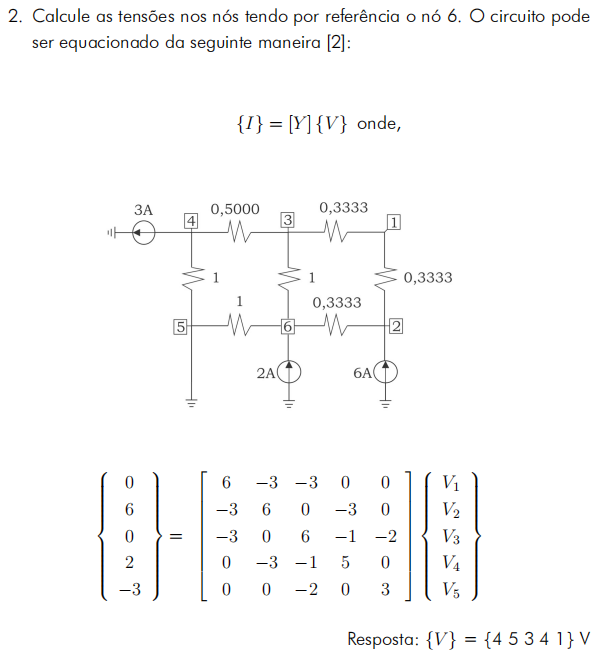

In [2]:
# Exercício 2
# Resolução de Sistema Lineares
# Método direto: Eliminação de Gauss

import numpy
from numpy import array, zeros

def GaussEliminacao(A,b):
  n = len(b)
  x = zeros(n,float)
  #print(x)
  #eliminação progressiva
  for k in range (n-1):
    for i in range (k+1,n):
      #print ("k=", k, ", i=", i)
      if A[i,k] == 0:
        continue
      fator = A[k,k] / A[i,k]
      #print(A[k,k], A[i,k])
      A[i,:] = A[k,:]-A[i,:]*fator
      b[i] = b[k] - b[i]*fator
  print(f'A = \n {A}')
  print(f'b = \n {b}')

  for row in range(n-1,-1,-1):
    x[row]= b[row]
    for k in range(n-1, row, -1):
      x[row] = x[row] - A[row,k]*x[k]
    x[row] = x[row]/A[row,row]
  return(x)

# Uso do método
A = array([[ 6, -3, -3,  0, 0],
           [-3,  6,  0, -3, 0],
           [-3,  0,  6, -1, -2],
           [ 0, -3, -1,  5, 0],
           [ 0,  0,  -2, 0, 3],])

b = array([0, 6, 0, 2, -3])
x = GaussEliminacao(A,b)

print("\n V = ", x)

A = 
 [[  6  -3  -3   0   0]
 [  0   9  -3  -6   0]
 [  0   0  24 -12 -12]
 [  0   0   0  24 -12]
 [  0   0   0   0  36]]
b = 
 [ 0 12 12 84 36]

 V =  [4. 5. 3. 4. 1.]


**----------------------------------------------------------------------------------------------------------------------------------------------------------**


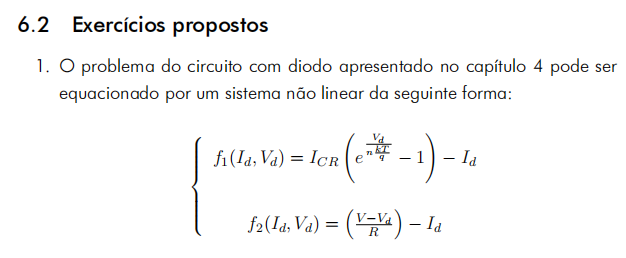
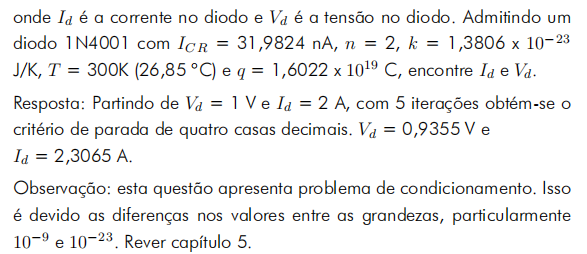

In [3]:
# Exercício 1
# Resolução de Sistema Não Lineares
# Método Newton-Raphson

from ast import AugAssign
from scipy.misc import derivative
import math as m
import numpy as np

def aux(fun_col, xi):
  y = np.zeros(len(fun_col))
  for i in range (len(fun_col)):
    y[i] = fun_col[i](*xi)  # cada função recebe todos os valores de x
  return y

def aux2(fun_j,xi):
  #print("aaaa")
  y = np.zeros((len(fun_j),len(fun_j[0]))) # criando uma matriz com o formato de fun
  for linha in range(len(fun_j)):
    y[linha] = aux(fun_j[linha],xi)
    #print(y[linha])
  return y

def raiz_newton_raph_j(fun,fun_j,xi,ite_max,tol):
  x = xi
  j = aux2(fun_j,xi)
  f = aux2(fun,xi)
  #print("j = ", j, "\n f = ", f, "\n fun = ", fun)
  delta_x = np.linalg.lstsq(j,f,rcond=-1) # proporcional a função y para variar mais o x de acordo com a distância em relação ao ponto de interesse
  #print("\n delta x = ", delta_x)
  erro = max(abs(np.divide(delta_x[0],xi)))
  for ite in range (ite_max):
    if (erro < tol):
      break
    x = x - delta_x[0]
    j = aux2(fun_j,x)
    #print("\n \n ", fun)
    f = aux2(fun,x)
    delta_x = np.linalg.lstsq(j,f,rcond=-1)
    erro = max(abs(np.divide(delta_x[0],x)))
    #print("\n \n j = ", j, "\n f = ", f, "\n delta_x = ", delta_x)
    #print("\n \n A raiz é ", *x," com ", ite+1, "iterações \n Erro = ", *erro)
  print("\n A raiz é ", *x," com ", ite+1, "iterações \n Erro = ", *erro)
  return x

def gerar():
  V = 24
  R = 10
  ICR = 31.9824       # ICR do diodo 1n4001
  n = 2
  k = 1.3806
  T = 300
  q = 1.6022
  q_k= 10000
  k_q= 0.0001
  nkT_q= (n*k*T*k_q)/q
  q_knT= q/(n*k*T*k_q)

  def f1(Id,Vd):
    #f1r = ICR*(np.e**( (Vd*q*q_k) / (n*k*T) ) -1) - Id
    f1r = ICR*(np.e**(np.log(10**(-9)) + (Vd / nkT_q)) -10**(-9)) - Id
    return f1r

  def f2(Id,Vd):
    f2r = ( (V-Vd) / R ) - Id
    return f2r

  def j11(x1, x2):    #f1 derivada x1
    return -1

  def j12(Id, Vd):    #f1 derivada x2
    return (ICR*(10**(-9))*q_knT*np.e**(Vd*q_knT))

  def j21(x1, x2):    #f2 derivada x1
    return -1

  def j22(x1, x2):    #f2 derivada x2
    return -1/R

  j = [[j11, j12],
       [j21, j22]]  # Matriz Jacobiana
  fun = [[f1], # precisa mandar como uma matriz coluna
         [f2]]
  return j, fun

x = np.array([[1], # aproximações iniciais
              [2]], np.double)

j,fun = gerar()

ite_m = 50
tol = 0.0001

res = raiz_newton_raph_j(fun,j, x,ite_m, tol)



 A raiz é  [2.30644843] [0.93551568]  com  24 iterações 
 Erro =  4.3996212322533135e-05


**----------------------------------------------------------------------------------------------------------------------------------------------------------**



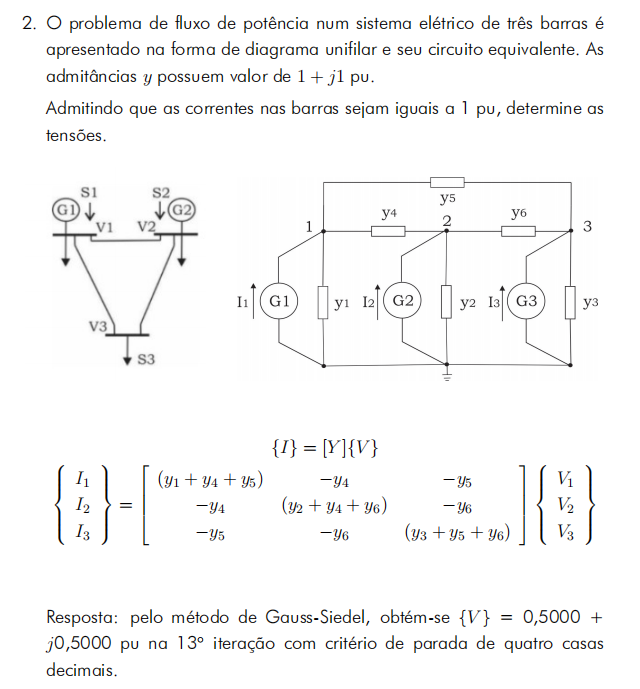

In [6]:
# Exercício 2
# Resolução de Sistema Não Lineares
# Método Gauss-Seidel

import numpy as np

def Gauss_Seidel(A, b, ite_m, tol):
  linha = len(A)       # numero de linhas da matriz
  coluna = len(A[0])   # numero de colunas da matriz (== numero de elementos na primeira linha)
  erro = 100
  x= np.zeros(len(A), dtype=complex)
  for ite in range(ite_m):
    x_anterior = x.copy()
    if (erro < tol):
      break
    for row in range(linha):
      x[row] = b[row]
      for j in range(coluna):
        if (row==j):
          continue
        x[row] = x[row]- A[row,j]*x[j]
      x[row] = x[row] / A[row,row]
    erro = max(abs((x-x_anterior)/x))*100
  print("\n \n x = ", x, "\n Com ", ite, " iterações", "\n Erro =", erro)
  return x

# Uso do método
z = complex(1,1)
k = complex(1)
A = array([[3*z, -z, -z],
           [-z, 3*z, -z],
           [-z, -z, 3*z]])
b = array([k, k, k])
ite_m = 100
tol = 0.0000001
Gauss_Seidel(A, b,ite_m, tol)




 
 x =  [0.5-0.5j 0.5-0.5j 0.5-0.5j] 
 Com  27  iterações 
 Erro = 9.340875857787418e-08


array([0.5-0.5j, 0.5-0.5j, 0.5-0.5j])